In [ ]:
!pip install Keras-Preprocessing
!pip install bangla-stemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Research Work/USA Conferrance/Dataset/Dataset1.csv')

In [ ]:
df.head()

,id,text,label
0,10856,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral
1,sentinob_1072,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral
2,sentinob_10530,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive
3,8001,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative
4,sentinob_10144,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive


In [ ]:
df.drop("id",inplace=True, axis=1)

In [ ]:
df.columns=["Sentences","Sentiment"]

In [ ]:
df.Sentiment.value_counts()

Negative    15767
Positive    12364
Neutral      7135
Name: Sentiment, dtype: int64

In [ ]:
# import pandas as pd

# data = pd.DataFrame({
#     'Sentiment': ['Negative', 'Positive', 'Neutral'],
#     'Count': [15767, 12364, 7135]
# })

# smallest_class_size = data['Count'].min()

# downsampled_data = pd.concat([
#     df[df['Sentiment'] == 'Negative'].sample(n=10000, replace=False),
#     df[df['Sentiment'] == 'Positive'].sample(n=10000, replace=False),
#     df[df['Sentiment'] == 'Neutral']
# ])

# df = downsampled_data.sample(frac=1).reset_index(drop=True)

In [ ]:
print("Total Sentences=",len(df))
print("Total Negative=",len(df[df.Sentiment=="Negative"]))
print("Total Positive=",len(df[df.Sentiment=="Positive"]))
print("Total Neutral=",len(df[df.Sentiment=="Neutral"]))

Total Sentences= 35266
Total Negative= 15767
Total Positive= 12364
Total Neutral= 7135


In [ ]:
# from bangla_stemmer.stemmer import stemmer
# import pandas as pd
# def augment_neutral_data(text):
#     stmr = stemmer.BanglaStemmer()
#     augmented_text = stmr.stem(text)
#     return augmented_text

# neutral_data = df[df['Sentiment'] == 'Neutral']['Sentences']
# augmented_neutral_data = neutral_data.apply(augment_neutral_data)
# augmented_df = pd.DataFrame({'Sentences': augmented_neutral_data, 'Sentiment': 'Neutral'})
# # Concatenate the augmented data with the original DataFrame
# augmented_df = pd.concat([df, augmented_df], ignore_index=True)

# print(augmented_df)

In [ ]:
print("Total Sentences=",len(df))
print("Total Negative=",len(df[df.Sentiment=="Negative"]))
print("Total Positive=",len(df[df.Sentiment=="Positive"]))
print("Total Neutral=",len(df[df.Sentiment=="Neutral"]))

Total Sentences= 35266
Total Negative= 15767
Total Positive= 12364
Total Neutral= 7135


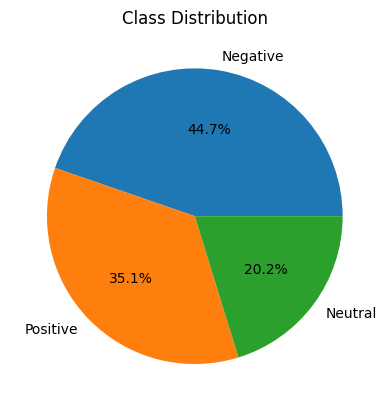

In [ ]:
class_counts = df['Sentiment'].value_counts()
class_percents = class_counts / class_counts.sum() * 100
# Plot the pie chart
plt.pie(class_percents, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

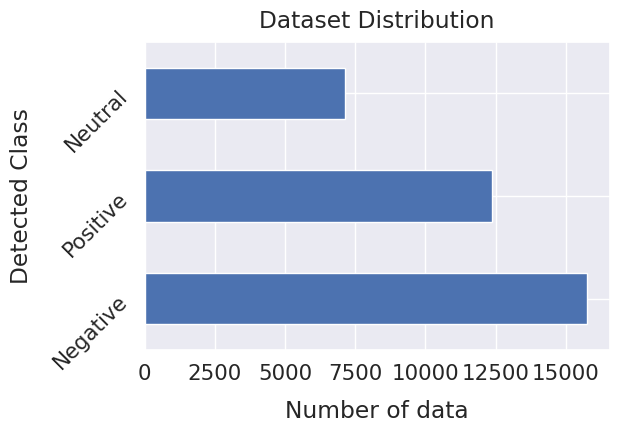

In [ ]:
sns.set(font_scale=1.4)
df['Sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
plt.savefig("Dataset Distribution BarChart.png")

# **Data Preperation and Preprocessing Step**

This Step Will Apply Over The Dataset
```
1.Convert Datatypes
2.Null Value Handle
3. Remove Dupliate Row
4. Remove Small Text
5. Remove Puncuatoion,Link,Emoji(No Character)
6. Remove Non bengali Character
7. Stopwords
8. Stemming
9. Sampling (Upper Samling and Downsampling)

```



In [ ]:
df["Sentiment"].value_counts()

Negative    15767
Positive    12364
Neutral      7135
Name: Sentiment, dtype: int64

# **1.Convert Datatypes**

**In this section, I will convert the data type**

In [ ]:
print(type(df['Sentences'][0]))

<class 'str'>


In [ ]:
df.dtypes

Sentences    object
Sentiment    object
dtype: object

In [ ]:
df['Sentences'] = df['Sentences'].apply(lambda x: str(x))

In [ ]:
df.dtypes

Sentences    object
Sentiment    object
dtype: object

# **2.Null Value Handle**

**In this dataset there are no null value**

In [ ]:
df.dropna(inplace=True,subset=['Sentences'])

In [ ]:
df.isnull().sum()

Sentences    0
Sentiment    0
dtype: int64

# **3.Remove Duplicate Rows**

**Before Delete the duplicate row**

In [ ]:
df.shape

(35266, 2)

In [ ]:
df.drop_duplicates(inplace=True)

**After Delete the duplicate row**

In [ ]:
df.shape

(34477, 2)

In [ ]:
df.head(30)

,Sentences,Sentiment
0,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral
1,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral
2,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive
3,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative
4,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive
5,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...,Negative
6,শাউয়ার মাগি তরে এত রিপোর্ট মারি তাও আসে কেন ভ...,Negative
7,"একপিছ খাসির হাড্ডি 220 , তুই খা",Negative
8,এই জিনিস সবজি দিয়ে খেলে জমার কথা না । কিন্তু ভ...,Positive
9,Mohi@ ভারত যদি বাংলাদেশের ওপর করে ? তখন ?,Neutral


# **4.Remove Non Character Word**

In [ ]:
import pandas as pd
import regex as re

def remove_non_bengali_characters(sentence):
    cleaned_sentence = re.sub(r'\P{Bengali}+', ' ', sentence)
    return cleaned_sentence.strip()

df['Sentences'] = df['Sentences'].apply(remove_non_bengali_characters)

# **5. Remove Non bengali Character**

In [ ]:
import re

# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
df['Bengali_Text'] = df['Sentences'].apply(remove_non_bengali_chars)


In [ ]:
df.head(30)

,Sentences,Sentiment,Bengali_Text
0,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...
1,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার
2,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার,Positive,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার
3,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...
4,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...
5,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...
6,শাউয়ার মাগি তরে এত রিপোর্ট মারি তাও আসে কেন ভ...,Negative,শাউয়ার মাগি তরে এত রিপোর্ট মারি তাও আসে কেন ভ...
7,একপিছ খাসির হাড্ডি তুই খা,Negative,একপিছ খাসির হাড্ডি তুই খা
8,এই জিনিস সবজি দিয়ে খেলে জমার কথা না কিন্তু ভর্...,Positive,এই জিনিস সবজি দিয়ে খেলে জমার কথা না কিন্তু ভর্...
9,ভারত যদি বাংলাদেশের ওপর করে তখন,Neutral,ভারত যদি বাংলাদেশের ওপর করে তখন


# **6.Removing stopwords**

In [ ]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Research Work/USA Conferrance/Dataset/Stopwords.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [ ]:
df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
sample_data = [10,400]
for i in sample_data:
     print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Detected as:-- ',df.Sentiment[i],'\n')

Original:
 সংগীতশিল্পী এন্ড্রু কিশোর রাজশাহীর একটি হাসপাতালে আইসিইউতে চিকিৎসাধীন 
Cleaned:
 সংগীতশিল্পী এন্ড্রু কিশোর রাজশাহীর হাসপাতালে আইসিইউতে চিকিৎসাধীন 
 Detected as:--  Positive 

Original:
 ফালতু জিনিস দেখেন কেন এখন থেকে দেখবেন না 
Cleaned:
 ফালতু জিনিস দেখেন দেখবেন 
 Detected as:--  Negative 



In [ ]:
df.head()

,Sentences,Sentiment,Bengali_Text,cleaned
0,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,আরো ভালো দলীয় অবস্থান পাকা
1,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,চুয়াডাঙ্গা বাড়ি বলেছে
2,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার,Positive,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার,ভাই সোনাই ঘোষ দই খেয়ে যাইতেন মজার
3,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,সমার তালুকদার ছবিতে ফেসটা জানি বন্য বন্য লাগতে...
4,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,ভাইয়া নুডলস টা কোথায় কিনতে পাওয়া প্লিজ একটু বলবেন


In [ ]:
df.drop(["Sentences","Bengali_Text"],axis=1,inplace=True)

In [ ]:
df.columns=["Sentiment","Sentences"]

# **7.Remove Small Text**

In [ ]:
df.shape

(34477, 2)

**Before remove the small text**

In [ ]:
df['no_char'] = df['Sentences'].apply(lambda Sentence: len(Sentence))

In [ ]:
df['length'] = df['Sentences'].apply(lambda x:len(x.split()))

In [ ]:
df = df.sort_values(by='length', ascending=False)

In [ ]:
df.head(100)

,Sentiment,Sentences,no_char,length
24172,Negative,আজকে ব্রাজিলের গোলের রেকর্ড ছোঁয়ার আরো একধাপ ...,11826,1638
1030,Positive,গ্রেপ্তার ইভ্যালির সিইও চেয়ারম্যান শঙ্কায় আছ...,9185,1264
15061,Negative,সুর পরিবর্তন মানুষের কয়েকদিন আগেও বলতো চাঁপাই...,3457,479
15826,Negative,মুসলিমরা হিন্দুদের ধ্বংস চাইলে ভারতবর্ষে হিন্দ...,2551,354
20334,Neutral,সফল ব্যবসায়িক আইডিয়া সফল হয়েছেন প্রমাণিত ব্যবস...,1825,311
...,...,...,...,...
21327,Neutral,নন টেকনিক্যাল পারসন রিপোর্ট লিখলে বর্তমানে বিদ...,564,83
5858,Negative,পড়া লেখা শেষ সবাই চাকরি খুজতে কারন সহজ ব্যবসা ...,448,81
4087,Neutral,তালেবান আরজিনাল ভণ্ড নারি ক্রিকেট হারাম করলো ক...,542,80
7810,Negative,দাদা বিদ্বেষ শব্দটার শাব্দিকঅর্থ জানেন প্রোফাই...,495,80


In [ ]:
dataset = df.loc[df.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 1493 Small conversations 
Total conversations: 32984


In [ ]:
newdf = dataset.loc[dataset['length'] <= 100]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 74 Big conversations 
Total conversations: 32910


**After remove the small text**

In [ ]:
newdf.shape

(32910, 4)

In [ ]:
newdf.head()

,Sentiment,Sentences,no_char,length
0,Negative,শিশুকে লঞ্চ জোর পানিতে ফেলে শিশুটি প্রচন্ড কান...,687,100
1,Neutral,বাংলাদেশের বেকারত্বের মূল জনসংখ্যা অনুপাতে কাজ...,663,100
2,Positive,তাইফুর রহমান জাবেদ তাইফুর রহমান জাবেদ ধরুন বাস...,648,99
3,Negative,বাংলা বাংলাদেশের জনসংখ্যার তুলনায় যথাযথ পরিমা...,684,99
4,Negative,বর্তমান বিশ্বে কট্টরপন্থী গোষ্ঠীর উত্থানের পেছ...,663,99


In [ ]:
newdf.drop(["no_char","length"],axis=1,inplace=True)

# **8.Stemming**

In [ ]:
!pip install bangla-stemmer

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

newdf['Sentences']=newdf['Sentences'].apply(stemming)
newdf.head()

,Sentiment,Sentences
0,Negative,শিশুকে লঞ্চ জোর পানিতে ফেলে শিশুটি প্রচন্ড কান...
1,Neutral,বাংলাদেশের বেকারত্বের মূল জনসংখ্যা অনুপাতে কাজ...
2,Positive,তাইফুর রহমান জাবেদ তাইফুর রহমান জাবেদ ধরুন বাস...
3,Negative,বাংলা বাংলাদেশের জনসংখ্যার তুলনায় যথাযথ পরিমা...
4,Negative,বর্তমান বিশ্বে কট্টরপন্থী গোষ্ঠীর উত্থানের পেছ...


In [ ]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()

# def stemming (text):
#     return ''.join([stemmer.stem(word) for word in text])

# dataset['Stemming']=dataset['cleaned'].apply(stemming)
# dataset.head()

In [ ]:
# dataset.drop(["cleaned"],axis=1,inplace=True)

In [ ]:
# import pandas as pd
# file_path = '/content/drive/MyDrive/Research Work/USA Conferrance/Dataset/Cleared.xlsx'
# dataset.to_excel(file_path, index=False)

In [ ]:
newdf.Sentiment.value_counts()

Negative    14828
Positive    11768
Neutral      6314
Name: Sentiment, dtype: int64

In [ ]:
from bangla_stemmer.stemmer import stemmer
import pandas as pd
def augment_neutral_data(text):
    stmr = stemmer.BanglaStemmer()
    augmented_text = stmr.stem(text)
    return augmented_text
neutral_data = newdf[newdf['Sentiment'] == 'Neutral']['Sentences']
augmented_neutral_data = neutral_data.apply(augment_neutral_data)
augmented_df = pd.DataFrame({'Sentences': augmented_neutral_data, 'Sentiment': 'Neutral'})
# Concatenate the augmented data with the original DataFrame
augmented_df = pd.concat([newdf, augmented_df], ignore_index=True)

print(augmented_df)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rule

In [ ]:
df=augmented_df.copy()

In [ ]:
df.Sentiment.value_counts()

Negative    14828
Neutral     12628
Positive    11768
Name: Sentiment, dtype: int64

In [ ]:
def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


In [ ]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [ ]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(Conversations)

    return tfidf,X

In [ ]:
def ml_models_defination():

    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    mnb_model = MultinomialNB(alpha=0.12)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','SVM','sgd']

    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_performance(model, X_train, X_test, y_train, y_test):
    my_dict = {}
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    # Accuracy
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y), 4) * 100

    # Precision, Recall, and F1 Score
    average = 'weighted'  # Choose appropriate average strategy for multi-class
    my_dict['Precision'] = round(precision_score(y_test, pred_y, average=average), 4) * 100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, average=average), 4) * 100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average=average), 4) * 100

    return my_dict


In [ ]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []

    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Multi. Naive Bayes','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

In [ ]:
y = ["আমি মনে করি আমি আমার টাকা অপচয়"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(y,3)


[('আম মন', 1), ('মন কর', 1), ('কর আম', 1)]

In [ ]:
z = ["আমি মনে করি আমি আমার টাকা অপচয়"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(z,3)

[('আম মন কর', 1), ('মন কর আম', 1), ('কর আম আম', 1)]

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]

for i,gram in enumerate(ngrams):
     tfidf,feature = calc_gram_tfidf(df.Sentences)
     labels = label_encoding(df.Sentiment,False)
     X_train,X_test,y_train,y_test = dataset_split(feature,labels)
     ml_models,model_names = ml_models_defination()
     accuracy = {f'{model_names[j]}': model_performance(model, X_train, X_test, y_train, y_test) for j, model in enumerate(ml_models)}

     with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy,f)

Feature Size :======> 504947

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 39224 
	Training		 31379 
	Test			 7845
Feature Size :======> 504947

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 39224 
	Training		 31379 
	Test			 7845
Feature Size :======> 504947

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 39224 
	Training		 31379 
	Test			 7845


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentences'], df['Sentiment'], test_size=0.2, random_state=42)

# Convert the text data into numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
# Train a Naive Bayes classifier on the training data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)

# Make predictions on the testing data using the Naive Bayes classifier
y_pred = nb_classifier.predict(X_test_vect)

In [ ]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
table

,Accuracy,Precision,Recall,F1 Score,Model Name
0,71.91,72.54,71.91,71.52,Logistic Regression
1,64.81,64.31,64.81,64.18,Decision Tree
2,72.66,73.55,72.66,72.00,Random Forest
3,71.22,72.51,71.22,70.83,Multi. Naive Bayes
4,53.69,54.79,53.69,53.64,KNN
5,75.02,75.26,75.02,74.85,SVM
6,60.40,65.94,60.40,58.69,SGD
